Dataset link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import plotly.express as px
import pickle

# Data Analysis

In [2]:
heart_data = pd.read_csv("D:\\01_IT_Courses\\Projects\\Heart-Failure-Prediction-App\\ML model\\Training Dataset\\heart.csv")

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Preprocessing

In [6]:
encoded_data = heart_data

In [7]:
heart_data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [8]:
def AnginaEncoder(x):
  if x=='Y':
    return 1
  else:
    return 0

In [9]:
encoded_data['ExerciseAngina'] = encoded_data['ExerciseAngina'].apply(AnginaEncoder)

In [10]:
encoded_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0


Columns with categorical values:

In [11]:
encoded_data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [12]:
encoded_data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [13]:
encoded_data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

Encoding categorical values:

In [14]:
encoded_data = pd.get_dummies(encoded_data, columns=['ChestPainType', 'ST_Slope', 'RestingECG'])

In [15]:
encoded_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,M,140,289,0,172,0,0.0,0,False,True,False,False,False,False,True,False,True,False
1,49,F,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,M,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,F,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,M,150,195,0,122,0,0.0,0,False,False,True,False,False,False,True,False,True,False


In [16]:
encoded_data.drop('Sex', axis='columns', inplace=True)

In [17]:
encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0,0.0,0,False,True,False,False,False,False,True,False,True,False
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,150,195,0,122,0,0.0,0,False,False,True,False,False,False,True,False,True,False


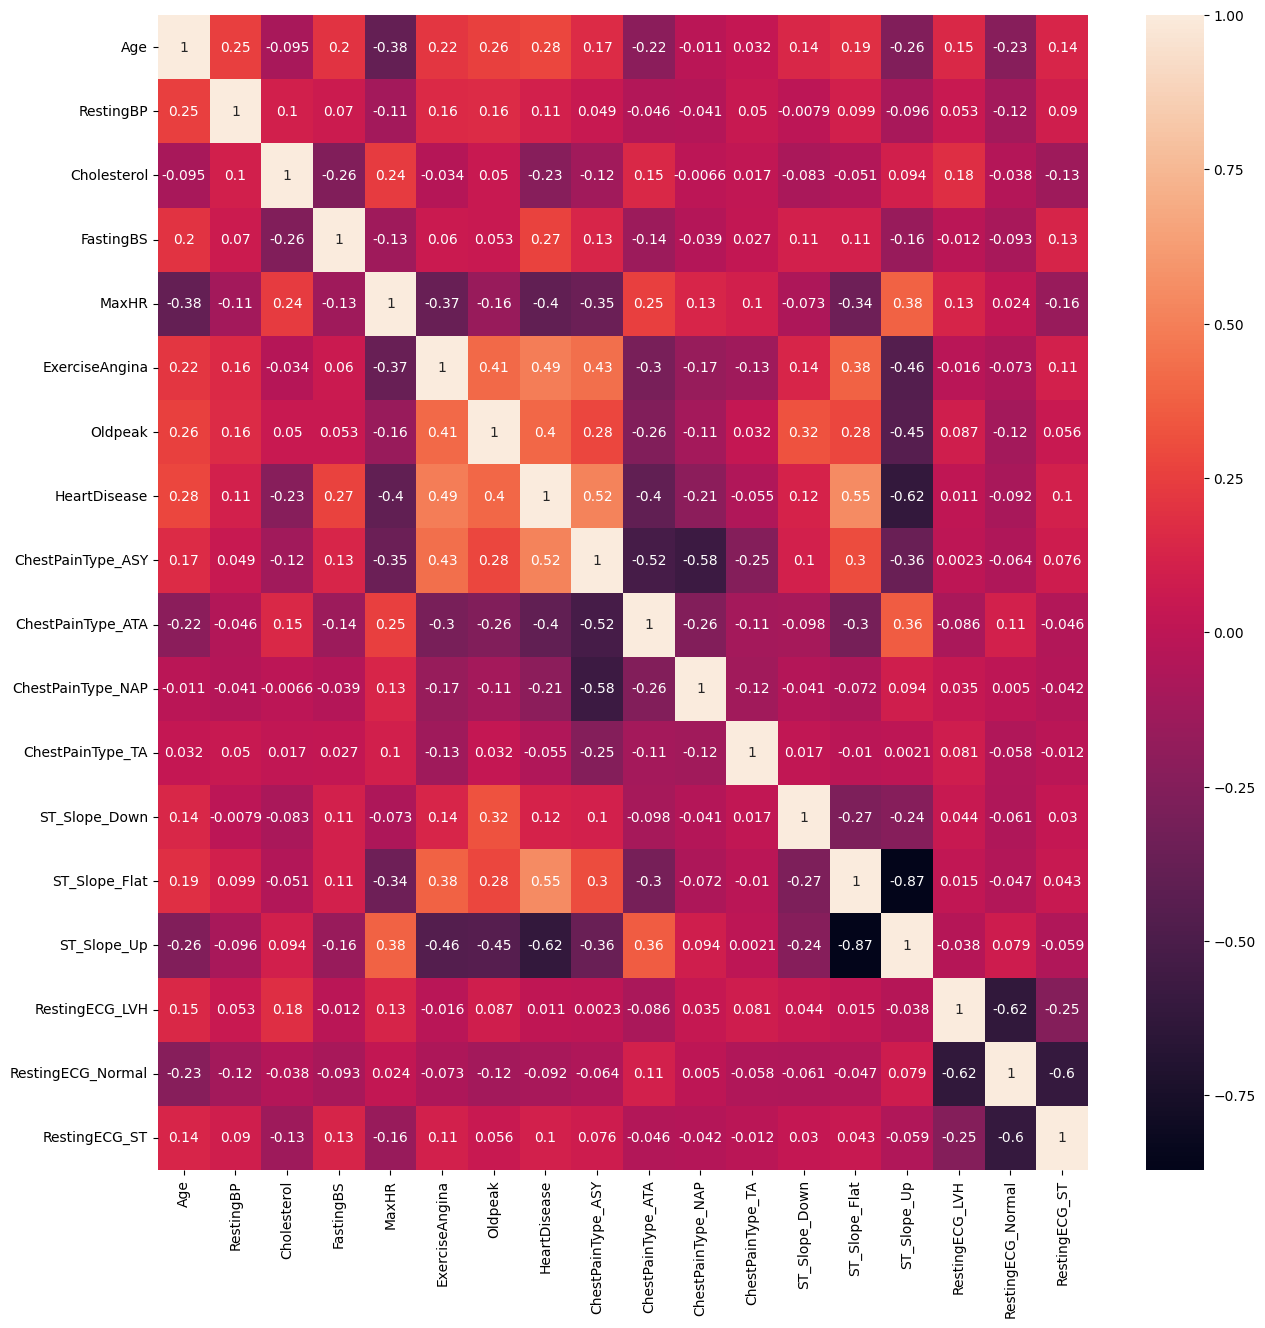

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(encoded_data.corr(), annot=True)
plt.show()

# Training Model

In [19]:
X = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']

## Comparing with other type of models

In [20]:
models = [LogisticRegression(max_iter=5000), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=5), SVC()]

In [21]:
cv_f1_macro_scores = []

for model in models:
  model.fit(X, y)
  cross_validation = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
  mean = cross_validation.mean()
  cv_f1_macro_scores.append(mean)

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

In [22]:
cv_f1_macro_scores

[0.8273595256320989,
 0.7372939509831341,
 0.810928533099557,
 0.6485236566010469,
 0.6735236837264323]

In [23]:
fig = px.bar(x=['LogisticRegression', 'DecisionTree', 'RandomForest', 'KNN', 'SVM'], y=cv_f1_macro_scores, text=cv_f1_macro_scores)
fig.update_layout(width=700, height=450, xaxis_title='Model', yaxis_title='f1_sores')

From this comparison, we can see that Logistic Regression model performs really well in this dataset. So let's build a Logistic Regression model and use it for our application.

## Logistic Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2)

In [25]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



LogisticRegression(max_iter=5000)

In [26]:
y_pred = logistic_model.predict(X_test)

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [27]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
f1

0.9

In [28]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy

0.8804347826086957

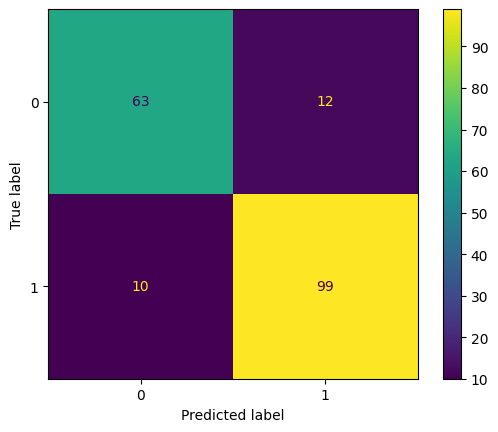

In [29]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [30]:
cross_validation = cross_val_score(logistic_model, X, y, cv=5, scoring='f1_macro')

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\97798\AppData\Local\Programs\Python\Pyt

In [31]:
cross_validation.mean()

0.8273595256320989

# Saving model

In [32]:
with open('heart_failure_predictor_logistic_regression_model.pickle', 'wb') as file:
  pickle.dump(logistic_model, file)

# Prediction with dummy values

In [33]:
prediction = logistic_model.predict([[40, 140, 270, 1, 190, 1, 1.0, True, False, False, False, False, False, True, False, True, False]])

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [34]:
prediction[0]

1

## Predicting probabilities

In [35]:
logistic_model.predict_proba([[40, 140, 270, 1, 190, 1, 1.0, True, False, False, False, False, False, True, False, True, False]])

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.37241514, 0.62758486]])

In [41]:
logistic_model.predict_proba([[40, 140, 289, 0, 172, 0, 0.0, False, True, False, False, False, False, True, False, True, False]])[0][1]

c:\Users\97798\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



0.02537588520521989